<a href="https://colab.research.google.com/github/kileighboggess/Bike-Store-Sales/blob/main/Healthcare_Stroke_Dataset_Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Healthcare Stroke Dataset Data Analytics Project**

---



In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html

# Load the dataset into a pandas DataFrame
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Connect to SQLite database (or create it)
conn = sqlite3.connect("healthcare.db")

# Load DataFrame into SQL table
df.to_sql("stroke_data", conn, if_exists="replace", index=False)

# Display the first few rows to confirm the data is loaded
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [37]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("healthcare.db")

# Save DataFrame to a table in SQLite
df.to_sql("stroke_data", conn, if_exists="replace", index=False)

# Verify that the table is loaded
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("\nAvailable Tables in Database:", cursor.fetchall())


Available Tables in Database: [('stroke_data',)]


In [38]:
# Execute SQL queries for exploration
try:
    # View the first few rows
    print("\nPreview of Data:")
    cursor.execute("SELECT * FROM stroke_data LIMIT 5;")
    for row in cursor.fetchall():
        print(row)

    # Summary statistics for numerical columns
    summary_query = """
    SELECT
        AVG(age) AS avg_age,
        AVG(avg_glucose_level) AS avg_glucose,
        AVG(bmi) AS avg_bmi
    FROM stroke_data;
    """
    print("\nSummary Statistics:")
    cursor.execute(summary_query)
    print(cursor.fetchall())

    # Count strokes by gender
    stroke_by_gender_query = """
    SELECT
        gender,
        COUNT(*) AS total_patients,
        SUM(CASE WHEN stroke = 1 THEN 1 ELSE 0 END) AS stroke_count
    FROM stroke_data
    GROUP BY gender;
    """
    print("\nStroke Counts by Gender:")
    cursor.execute(stroke_by_gender_query)
    print(cursor.fetchall())

    # Group data by age brackets
    age_group_query = """
    SELECT
        CASE
            WHEN age < 20 THEN '0-19'
            WHEN age BETWEEN 20 AND 39 THEN '20-39'
            WHEN age BETWEEN 40 AND 59 THEN '40-59'
            WHEN age BETWEEN 60 AND 79 THEN '60-79'
            ELSE '80+'
        END AS age_group,
        COUNT(*) AS total_patients,
        SUM(CASE WHEN stroke = 1 THEN 1 ELSE 0 END) AS stroke_patients,
        ROUND(100.0 * SUM(CASE WHEN stroke = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS stroke_percentage
    FROM stroke_data
    GROUP BY age_group
    ORDER BY age_group;
    """
    print("\nStroke Data by Age Group:")
    cursor.execute(age_group_query)
    for row in cursor.fetchall():
        print(row)

except sqlite3.Error as e:
    print(f"SQL error: {e}")


Preview of Data:
(9046, 'Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked', 1)
(51676, 'Female', 61.0, 0, 0, 'Yes', 'Self-employed', 'Rural', 202.21, None, 'never smoked', 1)
(31112, 'Male', 80.0, 0, 1, 'Yes', 'Private', 'Rural', 105.92, 32.5, 'never smoked', 1)
(60182, 'Female', 49.0, 0, 0, 'Yes', 'Private', 'Urban', 171.23, 34.4, 'smokes', 1)
(1665, 'Female', 79.0, 1, 0, 'Yes', 'Self-employed', 'Rural', 174.12, 24.0, 'never smoked', 1)

Summary Statistics:
[(43.226614481409015, 106.14767710371804, 28.893236911794673)]

Stroke Counts by Gender:
[('Female', 2994, 141), ('Male', 2115, 108), ('Other', 1, 0)]

Stroke Data by Age Group:
('0-19', 966, 2, 0.21)
('20-39', 1204, 6, 0.5)
('40-59', 1564, 60, 3.84)
('60-79', 1190, 141, 11.85)
('80+', 186, 40, 21.51)


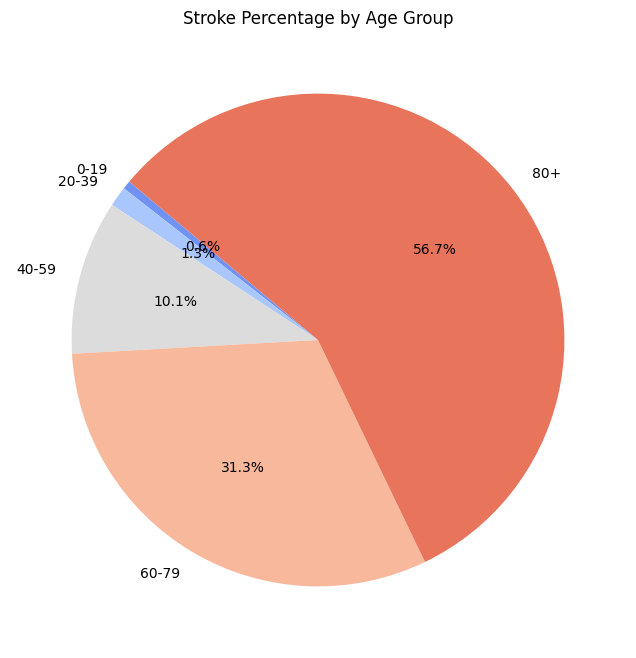

<ipython-input-39-f7723efb99a4>:24: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

<ipython-input-39-f7723efb99a4>:24: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior




Enhanced Pivot Table:
   age_group   smoking_status  Total_Strokes  Total_Patients  \
0       0-19          Unknown              2             731   
1       0-19  formerly smoked              0              29   
2       0-19     never smoked              0             187   
3       0-19           smokes              0              19   
4      20-39          Unknown              0             251   
5      20-39  formerly smoked              2             153   
6      20-39     never smoked              1             544   
7      20-39           smokes              3             256   
8      40-59          Unknown             14             302   
9      40-59  formerly smoked             14             315   
10     40-59     never smoked             18             624   
11     40-59           smokes             14             323   
12     60-79          Unknown             25             225   
13     60-79  formerly smoked             45             340   
14     60-79     

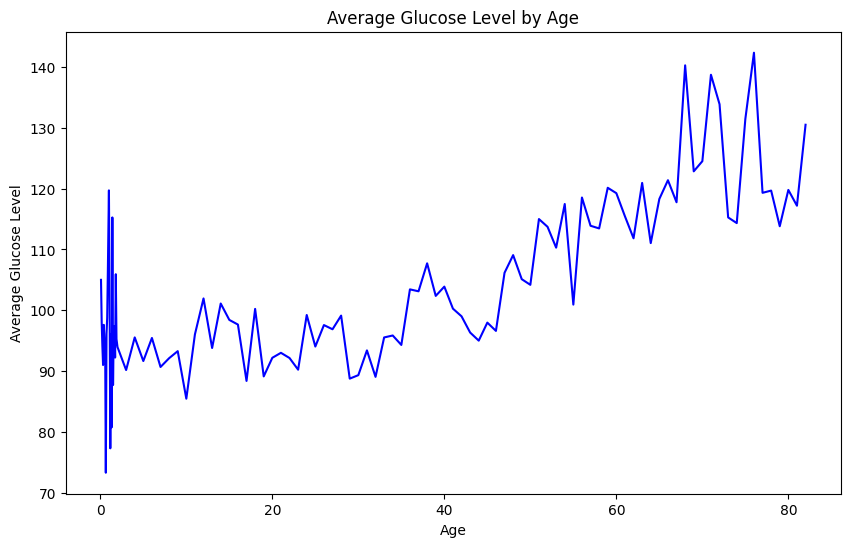

In [39]:
# Retrieve query results for visualization
age_group_df = pd.read_sql_query(age_group_query, conn)

# Pie Chart: Stroke Percentage by Age Group
plt.figure(figsize=(8, 8))
plt.pie(
    age_group_df["stroke_percentage"],
    labels=age_group_df["age_group"],
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("coolwarm", len(age_group_df))
)
plt.title("Stroke Percentage by Age Group")
plt.show()

# Add an age group column to the dataset for grouping
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 19, 39, 59, 79, 100],
    labels=["0-19", "20-39", "40-59", "60-79", "80+"]
)

# Enhanced pivot table with age group, smoking status, and stroke occurrences
pivot_table = pd.pivot_table(
    df,
    values="stroke",
    index=["age_group", "smoking_status"],
    aggfunc=["sum", "count"],  # Sum of strokes and total count of patients
    fill_value=0
)

# Add calculated metrics: percentage of strokes in each subgroup
pivot_table["percentage"] = (pivot_table[("sum", "stroke")] / pivot_table[("count", "stroke")]) * 100

# Rename columns for clarity
pivot_table.columns = ["Total_Strokes", "Total_Patients", "Stroke_Percentage"]

# Reset the index to display in a more readable format
pivot_table.reset_index(inplace=True)

# Print the enhanced pivot table
print("\nEnhanced Pivot Table:")
print(pivot_table)


# Line Graph: Average Glucose Level by Age
age_glucose_df = df.groupby("age")["avg_glucose_level"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x="age", y="avg_glucose_level", data=age_glucose_df, color="blue")
plt.title("Average Glucose Level by Age")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.show()

In [42]:
# Initialize Dash app
from dash import Dash  # Import the Dash class from the dash module
import dash_core_components as dcc
import dash_html_components as html

app = Dash(__name__)

# Dashboard layout with Enhanced Pivot Table
app.layout = html.Div([
    html.H1("Healthcare Data Dashboard", style={"text-align": "center"}),

    # Pie Chart
    dcc.Graph(
        id="pie-chart",
        figure={
            "data": [
                {
                    "values": age_group_df["stroke_percentage"],
                    "labels": age_group_df["age_group"],
                    "type": "pie",
                    "hoverinfo": "label+percent",
                    "textinfo": "percent",
                    "hole": 0.3,
                }
            ],
            "layout": {
                "title": "Stroke Percentage by Age Group",
            },
        },
    ),

    # Enhanced Pivot Table (Displayed as a data table)
    html.H2("Stroke Insights by Age Group and Smoking Status", style={"text-align": "center"}),
    html.Table([
        html.Tr([html.Th(col) for col in pivot_table.columns]),
        *[
            html.Tr([html.Td(row[col]) for col in pivot_table.columns])
            for _, row in pivot_table.iterrows()
        ],
    ]),

    # Line Graph
    dcc.Graph(
        id="line-graph",
        figure={
            "data": [
                {"x": age_glucose_df["age"], "y": age_glucose_df["avg_glucose_level"], "type": "line", "name": "Avg Glucose Level"}
            ],
            "layout": {
                "title": "Average Glucose Level by Age",
                "xaxis": {"title": "Age"},
                "yaxis": {"title": "Average Glucose Level"},
            },
        },
    ),
])

if __name__ == "__main__":
    app.run_server(debug=True)

<IPython.core.display.Javascript object>